# PROJET 12 : Détectez de faux billets avec Python

## Etape 1 - Import et chargement

In [2]:
from IPython.display import display, HTML

display(HTML('''
<style>
/* H1 - Très fort */
h1 {
    background-color: #117864;
    color: white;
    padding: 14px 20px;
    border-radius: 8px;
    font-family: 'Segoe UI', sans-serif;
    font-size: 30px;
    font-weight: bold;
    border-left: 6px solid #0e5d4b;
    box-shadow: 2px 2px 8px rgba(0, 0, 0, 0.2);
}

/* H2 - Moyen fort */
h2 {
    background-color: #D1F2EB;
    color: #117864;
    padding: 10px 16px;
    border-radius: 6px;
    font-family: 'Segoe UI', sans-serif;
    font-size: 24px;
    font-weight: 600;
    border-left: 4px solid #117864;
}

/* H3 - Léger */
h3 {
    background-color: #F4FBF9;
    color: #1D8348;
    padding: 8px 14px;
    border-radius: 4px;
    font-family: 'Segoe UI', sans-serif;
    font-size: 18px;
    font-weight: normal;
    border-left: 3px solid #A9DFBF;
}

/* H4 - Très léger */
h4 {
    background-color: #D6EAF8;
    color: #21618C;
    padding: 8px 14px;
    border-radius: 4px;
    font-family: 'Segoe UI', sans-serif;
    font-size: 16px;
    font-weight: bold;
    border-left: 2px solid #5DADE2;
}
</style>
'''))

### 1.1 - Importation des librairies

In [3]:
#Importation de la librairie Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import datetime as dt

#Importation de la librairie plotly express
import plotly.express as px

#Chargement des librairies graphiques
sns.set()

#Librairies régressions
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm  # nécessaire aussi pour anova_lm
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Librairie régressions
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import mode
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Librairie régression logistique
from sklearn.linear_model import LogisticRegression

#Librairie k-means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import mode

#Librairies KNN et Random Forest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.2 - Chargement du fichier

In [4]:
#Importation du fichier
df_billets = pd.read_csv(r"C:\Users\david\OneDrive\Documents\P12 Data Analyst\billets.csv", sep=';')
df_billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

Nous disposons actuellement de six informations géométriques sur un billet :

- diagonal : la diagonale du billet (en mm);
- height_left : la hauteur du billet (mesurée sur le côté gauche, en mm) ;
- height_right : la hauteur du billet (mesurée sur le côté droit, en mm) ;
- margin_low : la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;
- margin_up : la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;
- length : la longueur du billet (en mm).


## Etape 2 - Analyse exploratoire du fichier

In [5]:
#Structure du dataframe
print(df_billets.shape)
df_billets.info()

(1500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [6]:
#Identification des valeurs manquantes
df_billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

37 valeurs manquantes identifiés en margin_low

### 2.2 - Doublons de lignes

In [7]:
df_billets.duplicated().sum()

0

Aucune ligne répétée dans le dataframe.

### 2.3 - Valeurs manquantes et lignes vides

In [8]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions (outliers)
df_billets.describe(include='all')

is_genuine     diagonal  height_left  height_right   margin_low  \
count        1500  1500.000000  1500.000000   1500.000000  1463.000000   
unique          2          NaN          NaN           NaN          NaN   
top          True          NaN          NaN           NaN          NaN   
freq         1000          NaN          NaN           NaN          NaN   
mean          NaN   171.958440   104.029533    103.920307     4.485967   
std           NaN     0.305195     0.299462      0.325627     0.663813   
min           NaN   171.040000   103.140000    102.820000     2.980000   
25%           NaN   171.750000   103.820000    103.710000     4.015000   
50%           NaN   171.960000   104.040000    103.920000     4.310000   
75%           NaN   172.170000   104.230000    104.150000     4.870000   
max           NaN   173.010000   104.880000    104.950000     6.900000   

          margin_up      length  
count   1500.000000  1500.00000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean       3.151473   112.67850  
std        0.231813     0.87273  
min        2.270000   109.49000  
25%        2.990000   112.03000  
50%        3.140000   112.96000  
75%        3.310000   113.34000  
max        3.910000   114.44000

On constate pour la variable "margin_low" il manque 37 valeurs : nous allons compléter ces valeurs vides à l'aide la régression linéaire.

In [9]:
#Nettoyage des données : Valeurs vides/ Valeurs nulles ou NaN
print(df_billets.isnull().values.any())
print(df_billets.isnull().values.sum())

True
37


In [10]:
#Détail des lignes vides en colonne "margin_low"
df_billets.loc[df_billets['margin_low'].isnull()]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [11]:
#Création d'une liste des index de lignes comportant des valeurs vides - Pour vérification après application de la régression linéaire sur valeurs vides
index_valeurs_vides = (df_billets.loc[df_billets['margin_low'].isnull()]).index
index_valeurs_vides.to_numpy()
print(index_valeurs_vides)

Index([  72,   99,  151,  197,  241,  251,  284,  334,  410,  413,  445,  481,
        505,  611,  654,  675,  710,  739,  742,  780,  798,  844,  845,  871,
        895,  919,  945,  946,  981, 1076, 1121, 1176, 1303, 1315, 1347, 1435,
       1438],
      dtype='int64')


ETAPE 1 : VERIFICATION DES CONDITIONS DE LA REGRESSION LINEAIRE

Pour utiliser une régression linéaire, les 5 conditions ci-dessous doivent être respectées : 
- Linéarité : les relations entre les variables explicatives et la variable cible (margin_low) doivent être linéaires
- Normalité des résidus : les erreurs doivent suivre une distribution normale
- Homoscédasticité : la variance des résidus doit être constante (pas d’effet “entonnoir”)
- Indépendance des erreurs : les erreurs doivent être indépendantes entre elles (surtout important avec des données temporelles ou ordonnées)
- Absence de colinéarité entre variables explicatives (pas de forte corrélation entre elles)

In [12]:
#Utilisation de stats model pour affichage des détails
ModelMargin = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data=df_billets).fit()
anova_table = sm.stats.anova_lm(ModelMargin, typ=2)
#Affichage de la table ANOVA
print(ModelMargin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          2.60e-202
Time:                        21:20:20   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

=>>> Normalité :

p-value du test de Shapiro : 8.540482210328548e-11


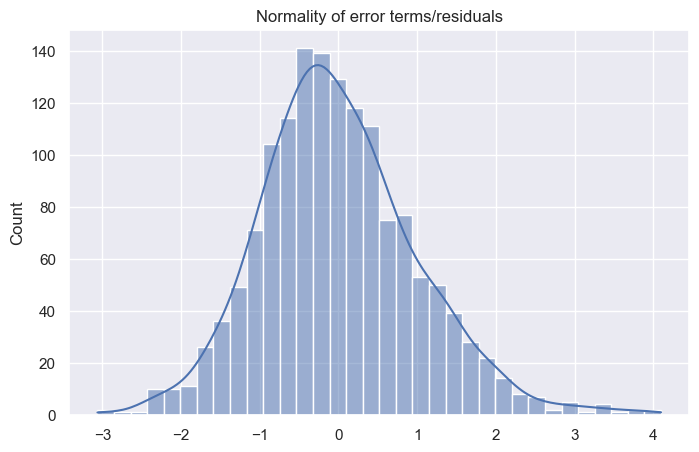

In [13]:
#Evaluation de la normalité des résidus (erreurs) d’un modèle de régression "ModelMargin"
residuals = ModelMargin.resid_pearson

plt.figure(figsize=(8,5))
p = sns.histplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# Test de normalité (Shapiro-Wilk)
stat, p_value = stats.shapiro(residuals)
print(f"p-value du test de Shapiro : {p_value}")       #Statistiquement : p > 0.05 → normalité non rejetée

Interprétation :
- Une bonne régression linéaire suppose que les erreurs suivent une distribution normale centrée en 0
- Si le graphe montre une forme de cloche symétrique, c’est bon signe => c'est notre cas ici
- Si c’est asymétrique ou plat/étalé, la normalité est remise en question
- Test de normalité (Shapiro-Wilk) : p > 0.05 donc la normalité n'est pas rejetée, ok dans notre cas

=>>> Linéarité & Homoscédasticité :

In [14]:
#Séparation des lignes connues (sans NaN) et inconnues (avec NaN)
df_billets_known = df_billets[df_billets['margin_low'].notna()]
df_billets_unknown = df_billets[df_billets['margin_low'].isna()]

#Séparation des variables d’entrée et variable cible
X_known = df_billets_known.drop(columns=['margin_low', 'is_genuine'])     #On retire "is_genuine" des predicteurs car c’est une variable cible (binaire) qui pourrait être corrélée à la variable à prédire (margin_low)
Y_known = df_billets_known['margin_low']

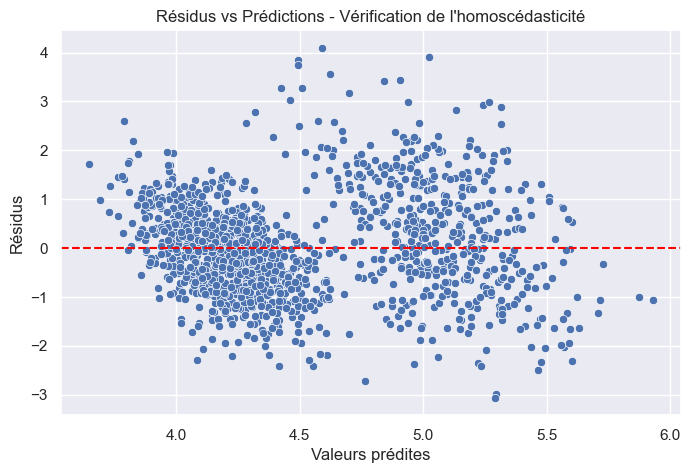

In [15]:
#Vérification - Homoscédasticité :

# y_pred = prédictions sur les données connues (y_pred_test)
y_pred = ModelMargin.predict(X_known)
residuals = ModelMargin.resid_pearson

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus vs Prédictions - Vérification de l'homoscédasticité")
plt.show()

But : 
- But : Vérifier l’hypothèse de linéarité et d’homoscédasticité (variance constante des erreurs) dans une régression linéaire
- Linéarité : Les résidus sont répartis aléatoirement autour de 0, il n’y a pas de structure visible dans le nuage de points, Pas de motif en arc, ni cône, ni tendance
- Homoscédasticité : Les points doivent être répartis de façon homogène (pas de forme en U ou entonnoir)

Interprétation :
- Ligne rouge horizontale à y = 0 : Indique l'endroit où l'erreur est nulle
- Si le modèle n'est pas adapté : Forme en courbe (U, cloche, arc) => Relation non linéaire / Cône (résidus s’élargissant ou rétrécissant) => Hétéroscédasticité (la variance des erreurs n'est pas constante) / Accumulation ou trou dans certaines zones => Manque de données ou problèmes de modélisation / Asymétrie ou concentration d’un côté => Problème de biais, mauvaise modélisation
- Dans notre cas : Les résidus sont bien centrés aléatoirement autour de 0, pas de forme en courbe visible sur le nuage, les valeurs extrêmes sont assez rares (bon comportement des erreurs) => Le modèle a l'air adapté au vu du graphique
- Point d'attention : Concentration plus forte des points à gauche (autour de 4.0) par rapport à la partie droite (vers 5.0–6.0) => distribution inégale des prédictions ou des groupes dans les données, liée au groupe de VRAIS et FAUX billets.  A gauche on a une plus grande dispersion => hétéroscédasticité? (variance des résidus qui diminue avec la valeur prédite alors qu'elle est censée être constante)

=>>> Indépendance des erreurs :

In [16]:
#Condition : Test d'indépendance des erreurs

# Étape 1 : Choix des variables explicatives
X = df_billets_known.drop(columns=['margin_low', 'is_genuine'])
y = df_billets_known['margin_low']

# Ajout de la constante (intercept)
X = sm.add_constant(X)

# Étape 2 : Régression linéaire
model = sm.OLS(y, X).fit()

# Étape 3 : Récupération des résidus
residuals = model.resid

# Étape 4 : Test de Durbin-Watson pour l'indépendance des erreurs
dw_stat = durbin_watson(residuals)
print(f"Statistique de Durbin-Watson : {dw_stat:.3f}")

Statistique de Durbin-Watson : 1.893


Interprétation :
- ≈ 2 → erreurs indépendantes et < 2 ou > 2 → corrélation autocorrélée suspectée
- Ici le résultat est très proche de 2, on considère qu'il n'y a pas d'autocorrélation significative détectée et l'indépendance des erreurs est globalement respectée

=>>> Absence de colinéarité entre variables explicatives : 

In [17]:
df_billets_known_numeric = df_billets_known.select_dtypes(include=[np.number])

In [18]:
#Condition : Test d'absence de colinéarité entre variables explicatives

# Définir X : variables explicatives (sans la cible 'margin_low')
X = df_billets_known.drop(columns=['margin_low', 'is_genuine'])

# Supprimer les lignes contenant des NaN
#X = X.dropna()

# Ajouter une constante pour le VIF
X_with_const = sm.add_constant(X)

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]
print(vif_data)

       Variable            VIF
0         const  590198.238883
1      diagonal       1.013613
2   height_left       1.138261
3  height_right       1.230115
4     margin_up       1.404404
5        length       1.576950


Interprétation : 
- VIF = 1 : pas de colinéarité
- VIF < 5 → acceptable
- VIF > 5 et < 10 → colinéarité modérée
- VIF > 10 → forte colinéarité (à corriger)
- Ici les valeurs de VIF sont toutes <2 pour l'ensemble des variables explicatives : aucune variable n’est colinéaire

ETAPE 2 : APPLICATION DE LA REGRESSION LINEAIRE

Passons à l'utilisation de la régression linéaire pour remplacer les valeurs vides : 
- Isolons les données remplies et les données vides
- Isolons la colonne "is_genuine" des prédicteurs pour ne pas fausser les résultats
- Normalisons les données en amont (régression linéaire est sensible aux échelles très différentes entre variables) : on veut centrer (moyenne = 0) et réduire (écart-type = 1)

In [19]:
df_billets_known.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [20]:
df_billets_unknown.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [21]:
# Régression linéaire pour remplacer les valeurs vides

# Scindons le dataset en une partie entraînement (80%) sur les données connues uniquement + une partie test (20%)
X_train, X_test, y_train, y_test = train_test_split(X_known, Y_known, test_size=0.20, random_state=42)

# Imputation par régression linéaire (IterativeImputer) : modèle de régression pour chaque variable manquante (pas besoin de le faire colonne par colonne avec ça)
imputer = IterativeImputer(estimator=LinearRegression(), max_iter=15, random_state=42)
X_train_imp  = imputer.fit_transform(X_train)
X_test_imp   = imputer.transform(X_test)

# Normalisation des données avec StandardScaler qui est adapté à la régression linéaire
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imp)                 
X_test_scaled = scaler.transform(X_test_imp)                       

# Entrainons le modele
reg1 = LinearRegression()
reg1.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
#Prédictions pour X_test
y_pred_test = reg1.predict(X_test_scaled)

#On peut maintenant calculer l'écart entre les vraies valeurs de test (y_test) et celles prédites par le modèle (y_pred_test)
print(f"R^2 : {np.round(reg1.score(X_test_scaled, y_test), 3)}")          #SCORE R2 (compris entre 0 et 1, dproche de 1 => meilleur modèle)
print(f"MAE: {mean_absolute_error(y_test, y_pred_test)}")                 #MAE (erreur moyenne en valeur absolue)
print(f"RMSE: {mean_squared_error(y_test, y_pred_test)}")                 #RMSE (pas contraint, un score plus petit correspond à un meilleur modèle)
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_test)}")     #MAPE (entre 0 et 1, proche de 0 => meilleur modèle)

R^2 : 0.546
MAE: 0.3353706932764837
RMSE: 0.19144954947493334
MAPE: 0.07467677345733455


R^2 : 0.546

- Interprétation : 54.6 % de la variance de la variable dépendante (y) est expliquée par le modèle de régression linéaire basé sur les variables indépendantes contenues dans X_test
- Le modèle explique bien une partie importante du phénomène étudié, mais il reste 54.46% de la variance non expliquée, possiblement due à des variables absentes, du bruit, ou une forme non-linéaire dans les données
- Généralement compris entre 0-1 (mais peut être <0) : modèle bon (>0.8), moyennement bon (0-5-0.8), faible (<0.5)

MAE: 0.3353

- Mesure l’erreur moyenne absolue entre les valeurs prédites et les valeurs réelles
- Interprétation : les prédictions du modèle s'écartent de 0.34mm de la valeur réelle en moyenne (en valeur absolue)

RMSE : 0.1914
- Mesure l’erreur moyenne entre les valeurs prédites par le modèle et les valeurs réelles, en gardant les unités d’origine de la variable cible
- Plus le RMSE est faible, meilleur est le modèle
- Interprétation : l’erreur moyenne des prédictions est d’environ 0.19 mm

MAPE : 0.0746

- Mesure l’erreur moyenne en pourcentage par rapport aux vraies valeurs
- Interprétation : ici on a 7.5 % d’erreur en moyenne (prédictions du modèle s’écartent en moyenne de 7.5 % par rapport aux vraies valeurs)
- Mape excellent (<10%), bon (10-20%), acceptable (20-50%) et faible (>50%)

==== RÉSUMÉ GLOBAL ====
                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Wed, 15 Oct 2025   Prob (F-statistic):          2.60e-202
Time:                        21:20:25   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948 

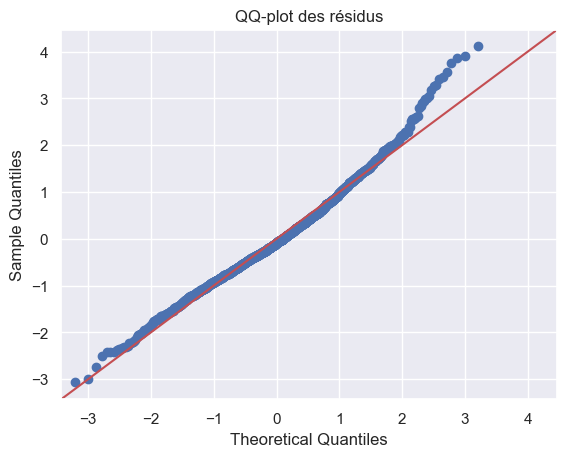

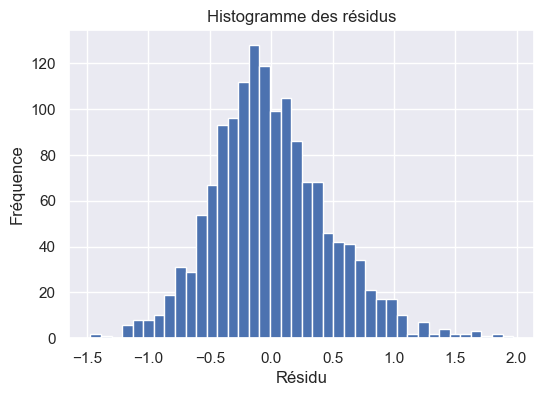

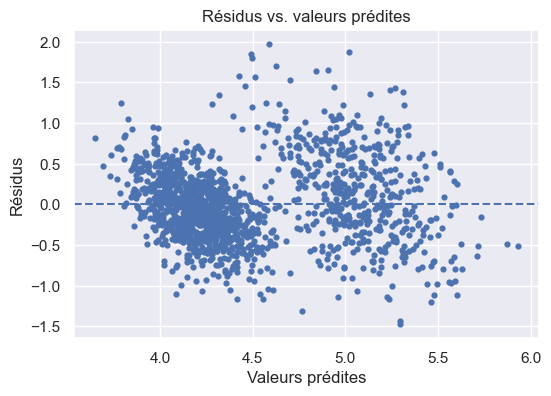

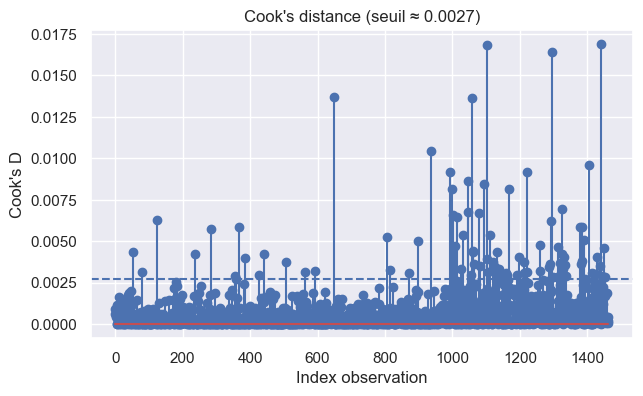


==== Top 10 points les plus influents (Cook's D) ====
      index  cooks_distance  residual    fitted
1478   1441        0.016881  1.569584  4.510416
1134   1103        0.016848  1.848594  4.491406
1329   1295        0.016391 -1.472342  5.292342
664     649        0.013722  1.253516  3.786484
1089   1059        0.013660 -1.433238  5.293238
965     937        0.010426 -1.312862  4.762862
1441   1404        0.009596  1.655010  4.904990
1254   1222        0.009208  1.358414  5.131586
1022    993        0.009150  0.953362  5.076638
1074   1045        0.008618 -1.118057  5.478057

==== CONSEILS ====
- VIF > 10 : multicolinéarité forte. Envisager de supprimer/fusionner certaines variables ou de faire une PCA.
- Inspecte le plot 'Résidus vs. prédictions' : si motif en entonnoir, hétéroscédasticité probable (penser à une transformation de y ou à un modèle robuste).
- Vérifie le QQ-plot : de gros écarts aux extrémités indiquent des queues épaisses (outliers).
- Examine les points au-dessus du 

In [23]:
# =========================
# DIAGNOSTICS RÉGRESSION OLS
# =========================
# - Si 'model' (statsmodels OLS) existe déjà dans l'environnement, il sera utilisé directement.
# - Sinon, préciser df, y_col et feature_cols pour ajuster le modèle.
#
# Sorties :
# - R², R² ajusté, F-stat, DW
# - VIF (multicolinéarité)
# - Graphiques : QQ-plot, histogramme des résidus, résidus vs. prédictions, Cook’s distance
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --------- (OPTION) À DÉCOMMENTER SI TU N'AS PAS ENCORE 'model' ---------
# df = ...  # ton DataFrame
# y_col = "margin_low"
# feature_cols = ["diagonal","height_left","height_right","margin_up","length"]
# X = sm.add_constant(df[feature_cols].copy(), has_constant='add')
# y = df[y_col].values
# model = sm.OLS(y, X).fit()
# ------------------------------------------------------------------------

# 1) RÉSUMÉ GLOBAL
print("==== RÉSUMÉ GLOBAL ====")
try:
    print(model.summary())
except NameError:
    raise RuntimeError("Aucun objet 'model' trouvé. Définis df, y_col, feature_cols (voir bloc option) pour créer le modèle.")

# 2) MÉTRIQUES CLÉS
print("\n==== MÉTRIQUES CLÉS ====")
print(f"R²:           {model.rsquared:.3f}")
print(f"R² ajusté:    {model.rsquared_adj:.3f}")
print(f"F-statistic:  {model.fvalue:.3f}  (p={model.f_pvalue:.3e})")

# Durbin-Watson (indépendance des erreurs)
dw = durbin_watson(model.resid)
print(f"Durbin-Watson: {dw:.3f}  (≈2 attendu si indépendance des erreurs)")

# 3) VIF (MULTICOLINÉARITÉ)
print("\n==== VIF (Multicolinéarité) ====")
exog = model.model.exog
names = model.model.exog_names
vif_df = pd.DataFrame({
    "variable": names,
    "VIF": [variance_inflation_factor(exog, i) for i in range(exog.shape[1])]
})
print(vif_df)

# 4) GRAPHIQUES DIAGNOSTIQUES
resid = model.resid
fitted = model.fittedvalues

# 4a) QQ-plot (normalité des résidus)
sm.qqplot(resid, line='45', fit=True)
plt.title("QQ-plot des résidus")
plt.show()

# 4b) Histogramme des résidus
plt.figure(figsize=(6,4))
plt.hist(resid, bins=40)
plt.title("Histogramme des résidus")
plt.xlabel("Résidu")
plt.ylabel("Fréquence")
plt.show()

# 4c) Résidus vs. valeurs prédites (homoscédasticité)
plt.figure(figsize=(6,4))
plt.scatter(fitted, resid, s=12)
plt.axhline(0, linestyle='--')
plt.title("Résidus vs. valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.show()

# 5) POINTS INFLUENTS (Cook’s distance)
influence = model.get_influence()
cooks, _ = influence.cooks_distance
n = len(resid)
threshold = 4 / n  # règle simple
plt.figure(figsize=(7,4))
plt.stem(np.arange(len(cooks)), cooks)
plt.axhline(threshold, linestyle='--')
plt.title(f"Cook's distance (seuil ≈ {threshold:.4f})")
plt.xlabel("Index observation")
plt.ylabel("Cook's D")
plt.show()

# Top 10 points les plus influents
top_idx = np.argsort(cooks)[-10:][::-1]
top_df = pd.DataFrame({
    "index": top_idx,
    "cooks_distance": cooks[top_idx],
    "residual": resid.iloc[top_idx] if hasattr(resid, "iloc") else resid[top_idx],
    "fitted": fitted.iloc[top_idx] if hasattr(fitted, "iloc") else fitted[top_idx],
})
print("\n==== Top 10 points les plus influents (Cook's D) ====")
print(top_df)

# 6) CONSEILS RAPIDES
print("\n==== CONSEILS ====")
if dw < 1.5 or dw > 2.5:
    print("- DW éloigné de 2 : possible autocorrélation. Envisager d'ajouter des variables dynamiques ou un modèle avec erreurs autocorrélées.")
if (vif_df["VIF"] > 10).any():
    print("- VIF > 10 : multicolinéarité forte. Envisager de supprimer/fusionner certaines variables ou de faire une PCA.")
else:
    print("- VIF OK : pas de multicolinéarité critique.")
print("- Inspecte le plot 'Résidus vs. prédictions' : si motif en entonnoir, hétéroscédasticité probable (penser à une transformation de y ou à un modèle robuste).")
print("- Vérifie le QQ-plot : de gros écarts aux extrémités indiquent des queues épaisses (outliers).")
print("- Examine les points au-dessus du seuil Cook’s : envisager une analyse métier ou une robustification du modèle.")


In [24]:
# Prédiction des valeurs manquantes — version HOTFIX
X_unknown = df_billets_unknown.drop(columns=['margin_low', 'is_genuine'], errors='ignore')

# Cohérent avec le fit sans noms de colonnes
X_unknown_scaled = scaler.transform(X_unknown.values)

predicted_margin_low = reg1.predict(X_unknown_scaled)
df_billets.loc[df_billets_unknown.index, 'margin_low'] = predicted_margin_low

In [25]:
df_billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483432     3.151473   
std       0.305195     0.299462      0.325627     0.659489     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [26]:
#Détail des lignes vides en colonne "margin_low"
df_billets.loc[df_billets['margin_low'].isnull()]

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []

Nous avons bien une valeur renseignée pour chacun des 1500 billets après application de la régression linéaire pour remplacer les valeurs non renseignées.

In [27]:
#Détail des lignes comportant initialement une margin_low vides, valeur qui a été remplacée par le biais de la régression linéaire
df_billets.loc[[72,99,151,197,241,251,284,334,410,413,445,481,505,611,654,675,710,739,742,780,798,844,845,871,895,919,945,946,981,1076,1121,1176,1303,1315,1347,1435,1438]]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45    4.323133       3.25   
99          True    171.93       104.07        104.18    4.393907       3.14   
151         True    172.07       103.80        104.38    4.416845       3.02   
197         True    171.45       103.66        103.80    4.337374       3.62   
241         True    171.83       104.14        104.06    4.634614       3.02   
251         True    171.80       103.26        102.82    3.815222       2.95   
284         True    171.92       103.83        103.76    4.190862       3.23   
334         True    171.85       103.70        103.96    4.133982       3.00   
410         True    172.56       103.72        103.51    4.156725       3.12   
413         True    172.30       103.66        103.50    4.179140       3.16   
445         True    172.34       104.42        103.22    4.168849       3.01   
481         True    171.81       103.53        103.96    3.775417       2.71   
505         True    172.01       103.97        104.05    4.063689       2.98   
611         True    171.80       103.68        103.49    4.307835       3.30   
654         True    171.97       103.69        103.54    4.152929       2.70   
675         True    171.60       103.85        103.91    4.073864       2.56   
710         True    172.03       103.97        103.86    4.437730       3.07   
739         True    172.07       103.74        103.76    4.474235       3.09   
742         True    172.14       104.06        103.96    4.349957       3.24   
780         True    172.41       103.95        103.79    4.097550       3.13   
798         True    171.96       103.84        103.62    3.629682       3.01   
844         True    171.62       104.14        104.49    4.360967       2.99   
845         True    172.02       104.21        104.05    4.088648       2.90   
871         True    171.37       104.07        103.75    4.234759       3.07   
895         True    171.81       103.68        103.80    3.903429       2.98   
919         True    171.92       103.68        103.45    3.742329       2.58   
945         True    172.09       103.74        103.52    4.242111       3.02   
946         True    171.63       103.87        104.66    4.711299       3.27   
981         True    172.02       104.23        103.72    4.131895       2.99   
1076       False    171.57       104.27        104.44    5.026958       3.21   
1121       False    171.40       104.38        104.19    4.774697       3.17   
1176       False    171.59       104.05        103.94    5.037325       3.02   
1303       False    172.17       104.49        103.76    5.013806       2.93   
1315       False    172.08       104.15        104.17    4.781467       3.40   
1347       False    171.72       104.46        104.12    5.698913       3.61   
1435       False    172.66       104.33        104.41    5.194886       3.56   
1438       False    171.90       104.28        104.29    5.121098       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

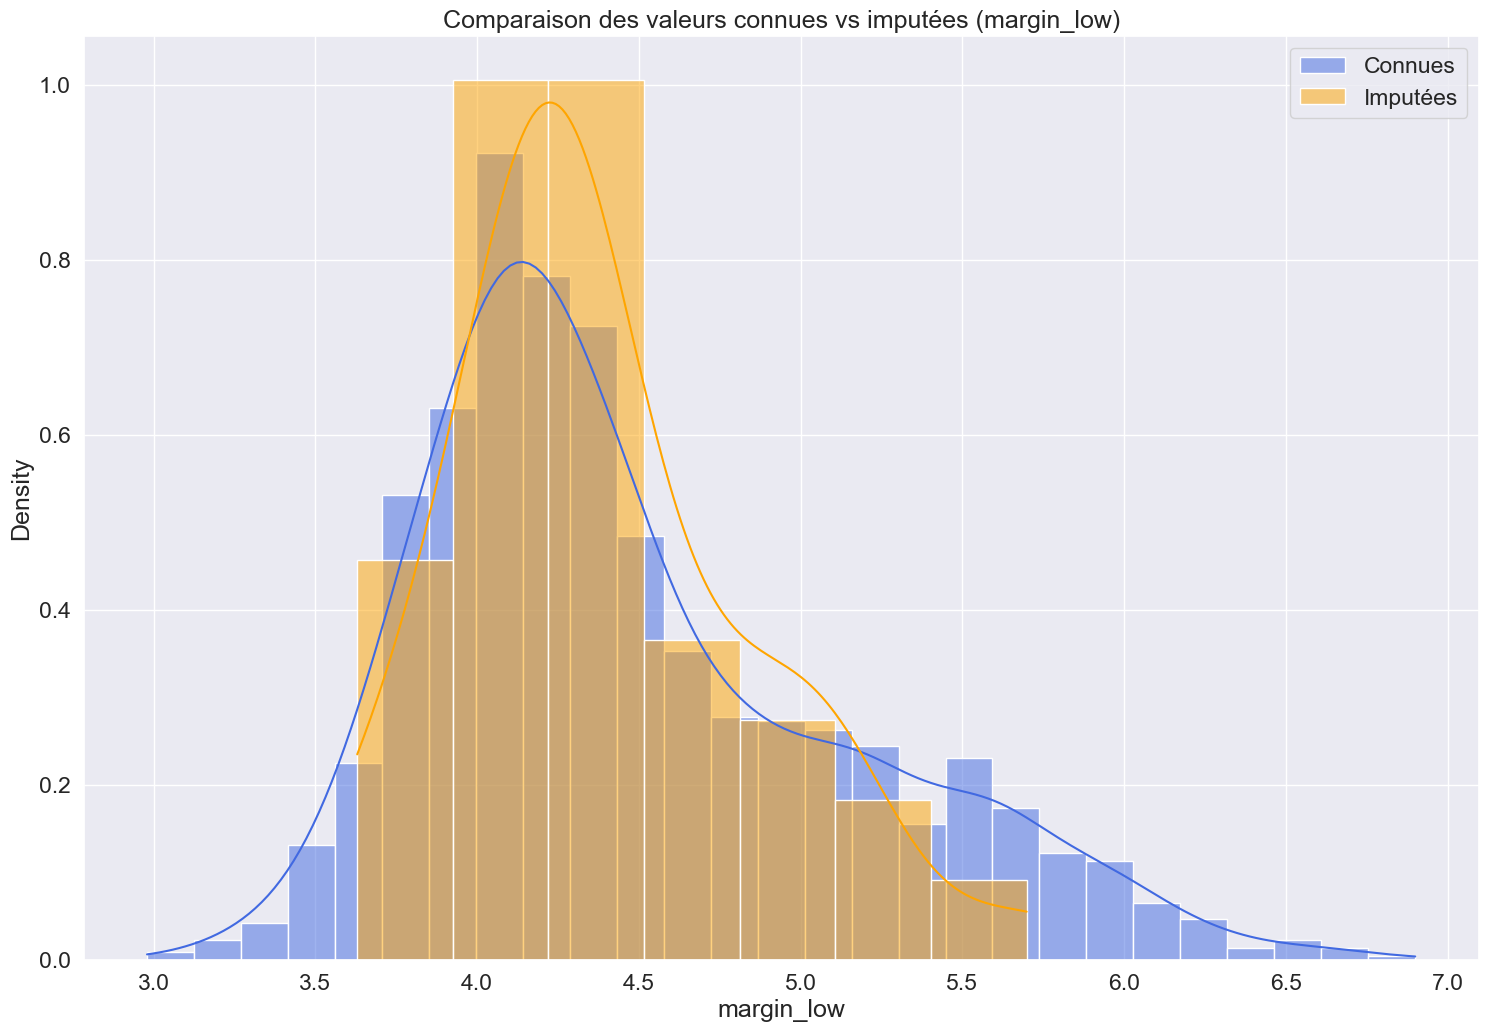

In [54]:
sns.histplot(df_billets_known["margin_low"], color="royalblue", label="Connues", kde=True, stat="density", alpha=0.5)
sns.histplot(predicted_margin_low, color="orange", label="Imputées", kde=True, stat="density", alpha=0.5)
plt.legend()
plt.title("Comparaison des valeurs connues vs imputées (margin_low)")
plt.show()


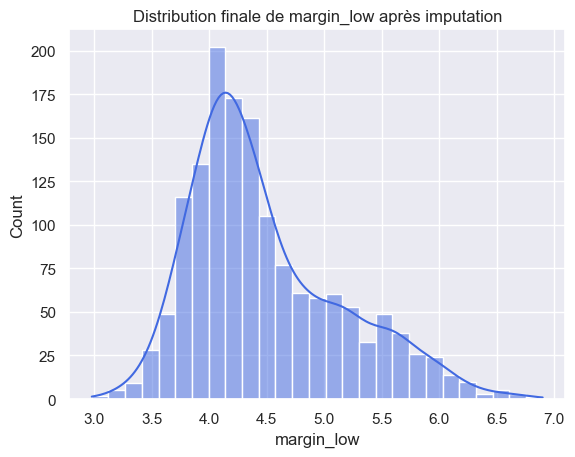

In [29]:
sns.histplot(df_billets["margin_low"], kde=True, color="royalblue")
plt.title("Distribution finale de margin_low après imputation")
plt.show()


### 2.4 - Outliers

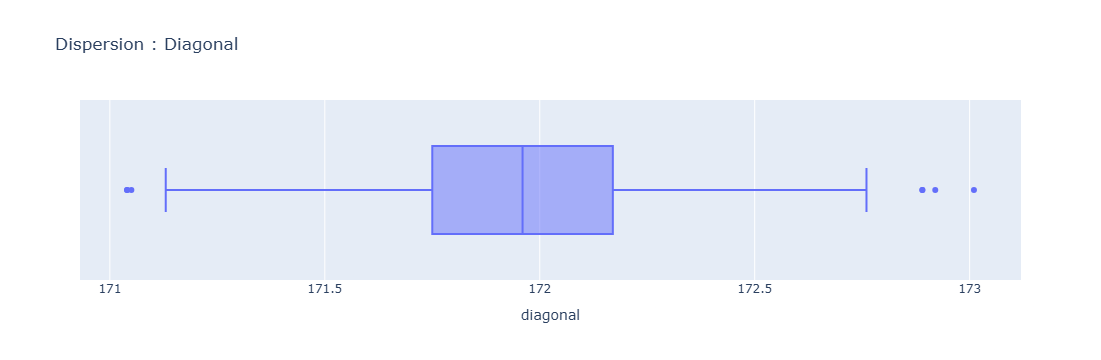

In [30]:
#Boite à moustache (Pandas) - Diagonal
plt_df_billets = px.box(df_billets, x='diagonal', width=1000, height=350, title="Dispersion : Diagonal")
plt_df_billets.show()

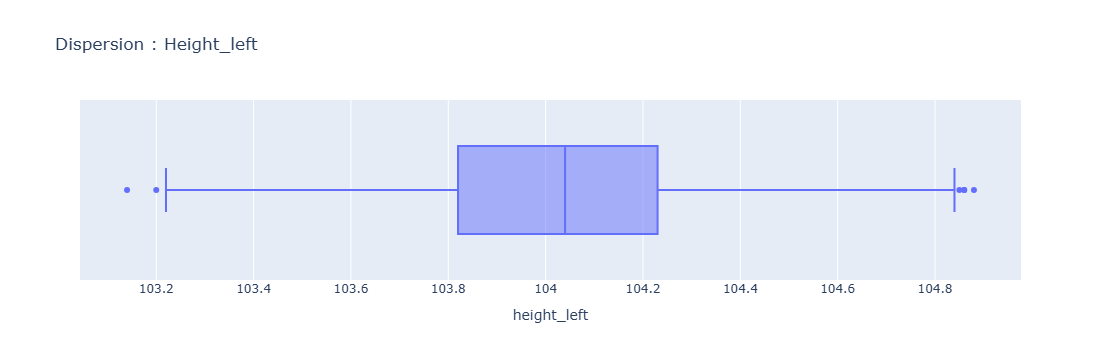

In [31]:
#Boite à moustache (Pandas) - height_left
plt_df_billets = px.box(df_billets, x='height_left', width=1000, height=350, title="Dispersion : Height_left")
plt_df_billets.show()

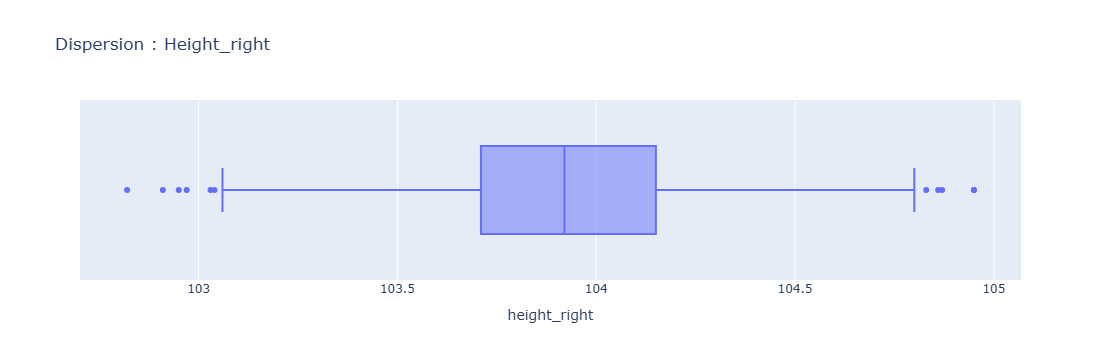

In [32]:
#Boite à moustache (Pandas) - height_right
plt_df_billets = px.box(df_billets, x='height_right', width=1000, height=350, title="Dispersion : Height_right")
plt_df_billets.show()

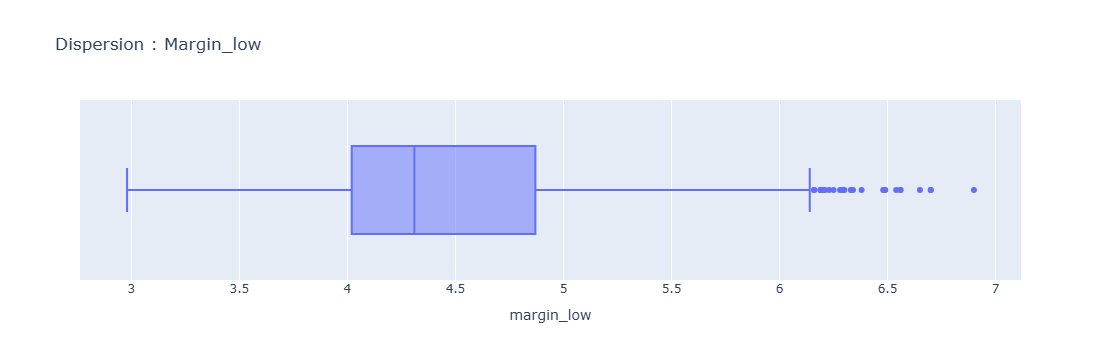

In [33]:
#Boite à moustache (Pandas) - margin_low
plt_df_billets = px.box(df_billets, x='margin_low', width=1000, height=350, title="Dispersion : Margin_low")
plt_df_billets.show()

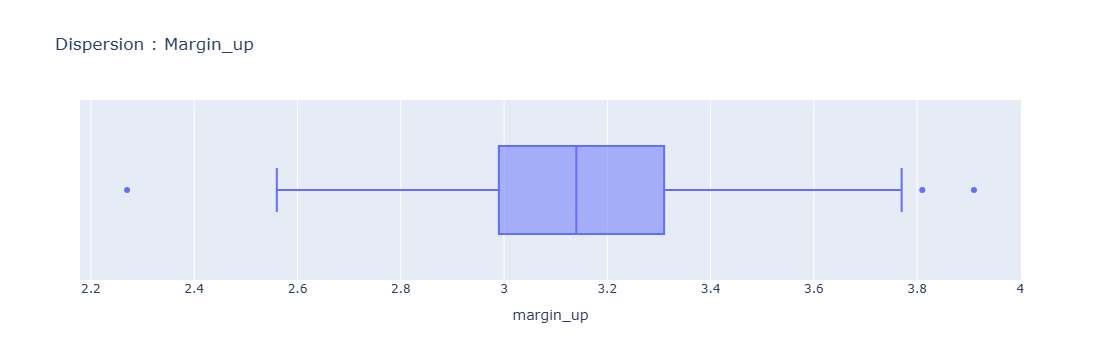

In [34]:
#Boite à moustache (Pandas) - margin_up
plt_df_billets = px.box(df_billets, x='margin_up', width=1000, height=350, title="Dispersion : Margin_up")
plt_df_billets.show()

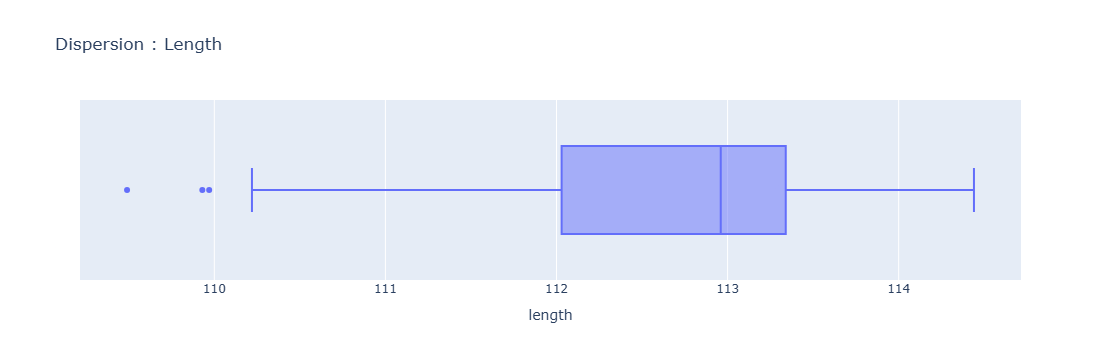

In [35]:
#Boite à moustache (Pandas) - length
plt_df_billets = px.box(df_billets, x='length', width=1000, height=350, title="Dispersion : Length")
plt_df_billets.show()

La distribution des valeurs de chacune des 6 variables paraît cohérente, nous n'avons pas besoin d'isoler des outliers pour la suite de l'analyse.

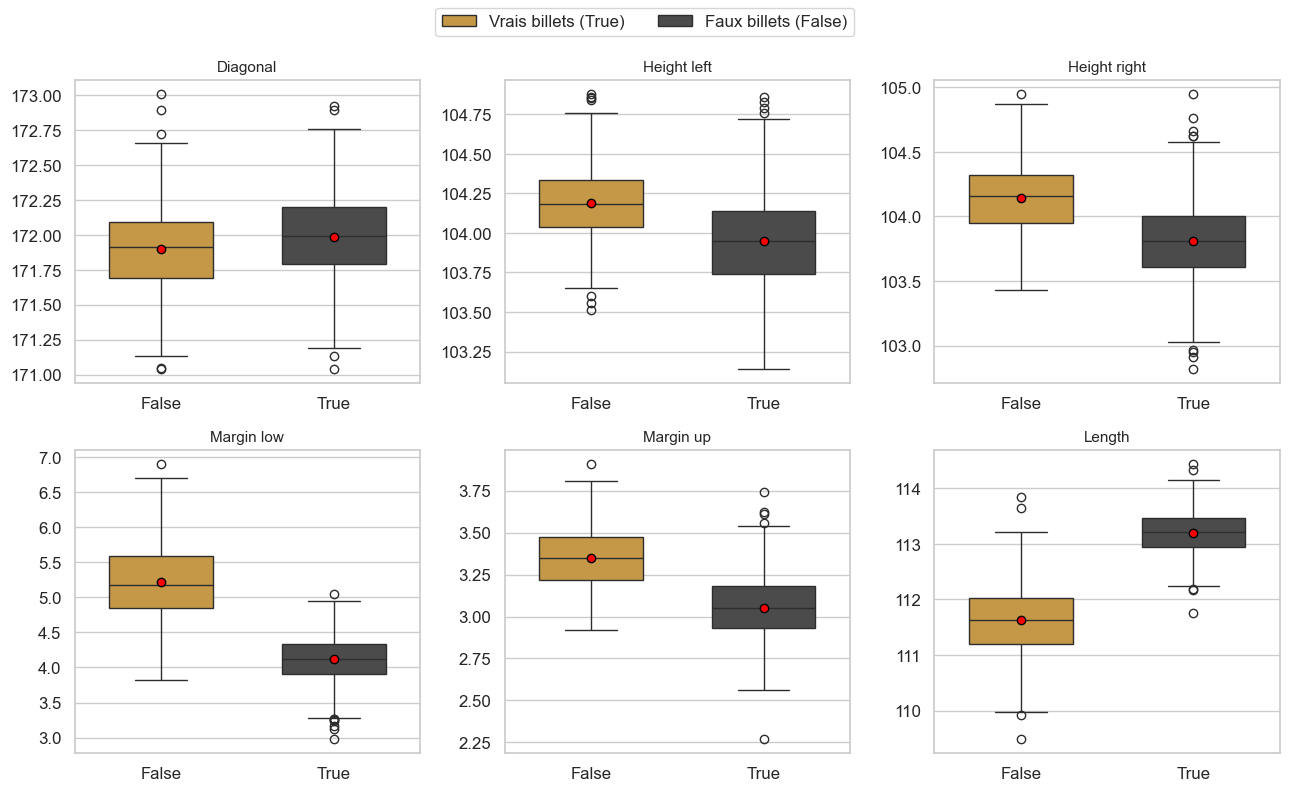

In [57]:
# Boxplots verticaux - Palette harmonisée (gris / orange doux)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.1)

# Palette personnalisée cohérente avec tes histogrammes
custom_palette = {True: "#4B4B4B", False: "#D99E32"}  # gris anthracite & orange doux

variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13, 8))
axs = axs.flatten()

for i, var in enumerate(variables):
    sns.boxplot(
        data=df_billets,
        x="is_genuine",
        y=var,
        hue="is_genuine",
        ax=axs[i],
        width=0.6,
        palette=custom_palette,
        showmeans=True,
        meanprops={
            "marker": "o",
            "markerfacecolor": "red",
            "markeredgecolor": "black",
            "markersize": 6
        }
    )
    axs[i].set_title(var.replace('_', ' ').capitalize(), fontsize=11)
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].legend_.remove()

# Titre général et légende commune
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, ["Vrais billets (True)", "Faux billets (False)"],
    loc='upper center', ncol=2, frameon=True
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Remarques liés aux boxplots par nature de billets :
- Variable 'diagonal' :     pas de différence notable selon vrai ou faux billet (même amplitude de distribution et les 2 moyennes sont très proches)
- Variable 'height_left' :  La distribution est plus large pour les vrais billets et la moyenne est < aux faux billets
- Variable 'height_right' : Distribution similaire mais moyenne des dimensions de vrais billets < faux billets
- Variable 'margin_low' :   les dimensions des vrais billets sont systématiquement < aux dimensions des faux billets, distribution largement plus étalée pour les faux billets
- Variable 'margin_up' :    Remarque similaire à 'margin_low', mais cette fois il y a moins d'écart entre la moyenne des vrais et des faux billets, distribution similaire
- Variable 'length' :       Les dimensions des vrais billets sont systématiquement > à celles des faux billets, distribution plus étalée pour les faux billets

### 2.5 - Corrélation de variables

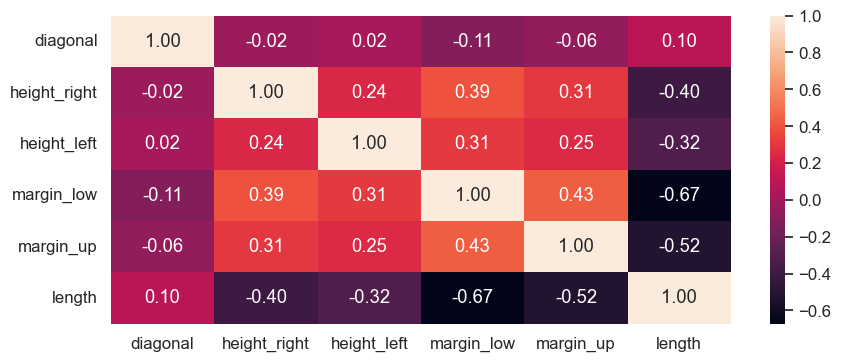

In [42]:
#Heatmap de corrélation - Sans "is_genuine"

#Création nouveau dataframe billets sans la colonne "is_genuine"
df_billets_dimensions = df_billets[['diagonal','height_right', 'height_left','margin_low', 'margin_up', 'length']]

#Création heatmap de corrélation sur variables de dimensions uniquement
plt.figure(figsize=(10, 4))
sns.heatmap(df_billets_dimensions.corr(), annot=True, fmt=".2f")
plt.show()

Seules les variables "length" et "margin_low" ont l'air d'être corrélées négativement (coefficient : -0.67).

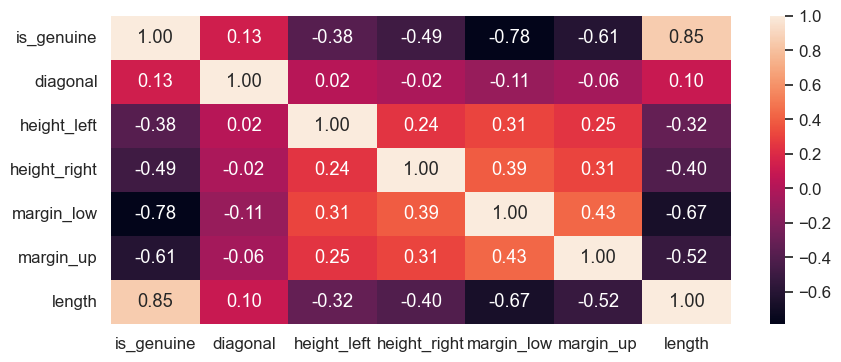

In [43]:
#Heatmap de corrélation - Avec "is_genuine"

#Création heatmap de corrélation sur variables de dimensions uniquement
plt.figure(figsize=(10, 4))
sns.heatmap(df_billets.corr(), annot=True, fmt=".2f")
plt.show()

Les variables "is_genuine" et "margin_low" ont l'air d'être corrélées négativement (coefficient : -0.78).

## Etape 3 - Analyse descriptive des billets

On souhaite en savoir un peu plus sur la répartition : 
- des dimensions de billets
- du nombre de vrais/faux billets

### 3.1 - Répartition du nombre de billets

In [44]:
#Répartition du nombre de billets par nature (Vrai/Faux)

#Vérification nombre de billets
print(df_billets['is_genuine'].value_counts())

#Création dataframe récapitulant les quantités par nature de billets
nombre_billets = df_billets.groupby(['is_genuine'])['is_genuine'].count().reset_index(name='quantité')
display(nombre_billets)

is_genuine
True     1000
False     500
Name: count, dtype: int64


is_genuine  quantité
0       False       500
1        True      1000

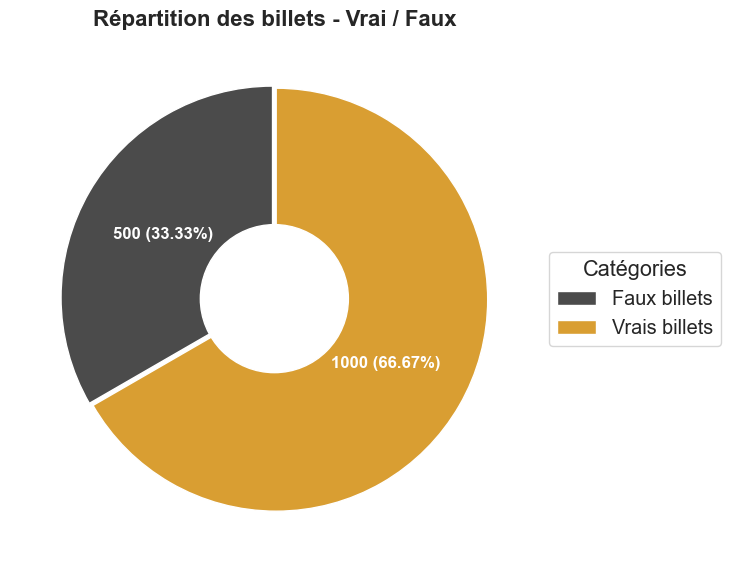

In [62]:
# Graphique - Répartition des vrais / faux billets (Donut + légende à droite)
import matplotlib.pyplot as plt

# Fonction pour afficher nombre + pourcentage
def autopct_format(values):
    def inner_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{val} ({pct:.2f}%)"
    return inner_autopct

# Création du graphique
fig, ax = plt.subplots(figsize=(8,6))
wedges, texts, autotexts = ax.pie(
    nombre_billets['quantité'],
    labels=None,  # On gère la légende à part
    autopct=autopct_format(nombre_billets['quantité']),
    startangle=90,
    explode=[0.01, 0.01],
    textprops={'color': 'white', 'fontweight': 'bold', 'fontsize': 12},
    colors=['#4B4B4B', '#D99E32']  # gris / orange cohérents
)

# Titre
ax.set_title("Répartition des billets - Vrai / Faux", fontsize=16, fontweight='bold')

# Légende sur le côté droit
ax.legend(
    wedges,
    ["Faux billets", "Vrais billets"],
    title="Catégories",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Centre vide (effet donut)
centre_circle = plt.Circle((0, 0), 0.35, fc='white')
fig.gca().add_artist(centre_circle)

# Nettoyage
plt.ylabel(None)
plt.tight_layout()
plt.show()


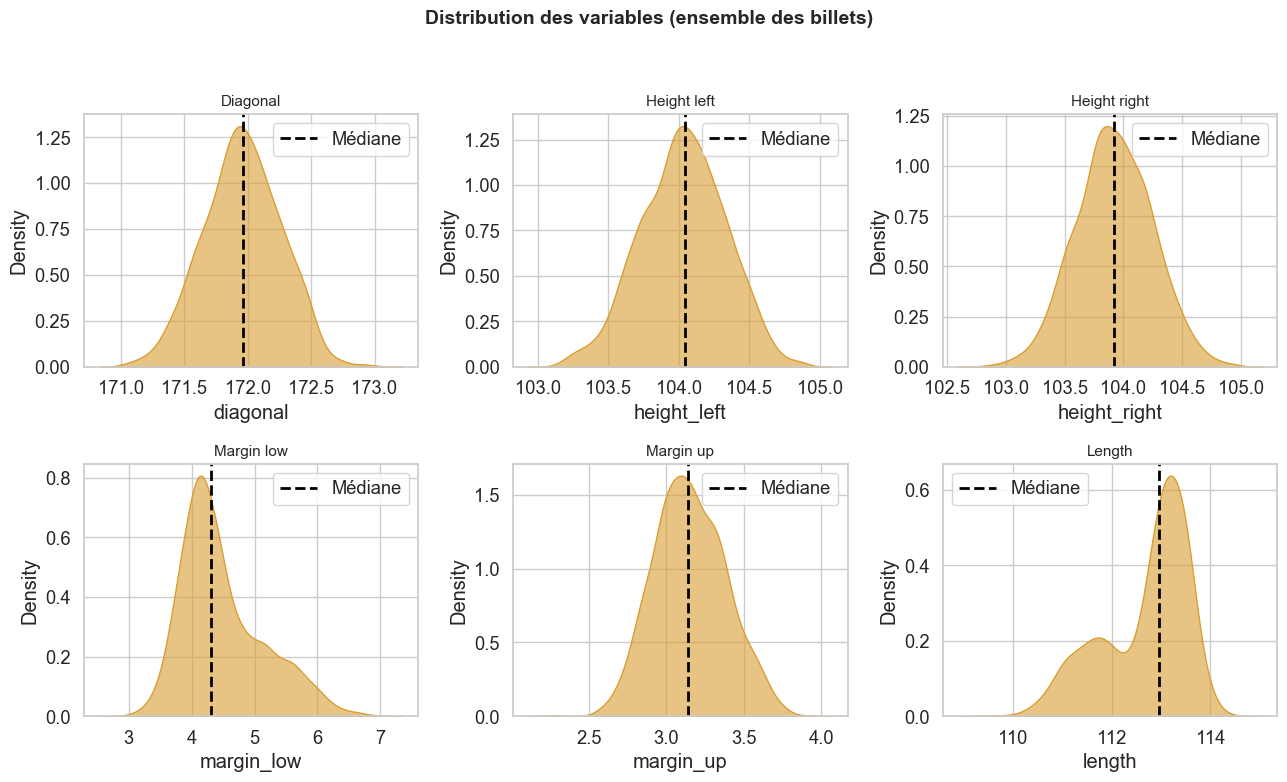

In [66]:
# Distribution des variables continues (KDE)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)
variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

fig, axs = plt.subplots(2, 3, figsize=(13, 8))
axs = axs.flatten()

for i, var in enumerate(variables):
    sns.kdeplot(data=df_billets, x=var, fill=True, color="#D99E32", alpha=0.6, ax=axs[i])
    axs[i].axvline(df_billets[var].median(), color="black", linestyle="--", lw=2, label="Médiane")
    axs[i].set_title(var.replace('_', ' ').capitalize(), fontsize=11)
    axs[i].legend()

fig.suptitle("Distribution des variables (ensemble des billets)", fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


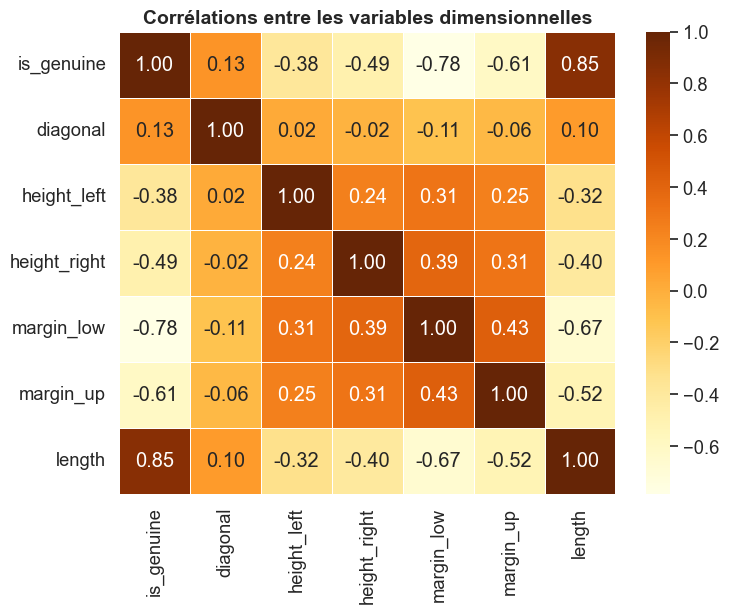

In [64]:
# Matrice de corrélation (heatmap)
plt.figure(figsize=(8,6))
sns.heatmap(df_billets.corr(), annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5)
plt.title("Corrélations entre les variables dimensionnelles", fontsize=14, fontweight="bold")
plt.show()


### 3.2 - Répartition des dimensions de billets

In [46]:
#Création dataframe contenant uniquement les VRAIS billets
df_vrai_billets = df_billets[(df_billets.is_genuine == True)].copy().reset_index(drop=True)
df_vrai_billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [47]:
#Description des vrais billets
df_vrai_billets.describe()

diagonal  height_left  height_right   margin_low   margin_up  \
count  1000.000000  1000.000000    1000.00000  1000.000000  1000.00000   
mean    171.987080   103.949130     103.80865     4.118259     3.05213   
std       0.300441     0.300231       0.29157     0.317532     0.18634   
min     171.040000   103.140000     102.82000     2.980000     2.27000   
25%     171.790000   103.740000     103.61000     3.910000     2.93000   
50%     171.990000   103.950000     103.81000     4.120000     3.05000   
75%     172.200000   104.140000     104.00000     4.340000     3.18000   
max     172.920000   104.860000     104.95000     5.040000     3.74000   

            length  
count  1000.000000  
mean    113.202430  
std       0.359552  
min     111.760000  
25%     112.950000  
50%     113.205000  
75%     113.460000  
max     114.440000

In [48]:
#Création d'un dataframe contenant uniquement les FAUX billets
df_faux_billets = df_billets[(df_billets.is_genuine == False)].copy().reset_index(drop=True)
df_faux_billets.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0       False    172.28       103.95        103.91        4.78       3.31   
1       False    171.92       103.86        104.30        4.96       3.13   
2       False    171.59       104.14        104.38        4.97       3.47   
3       False    172.02       104.33        104.33        5.19       3.21   
4       False    172.55       104.25        104.23        5.60       3.13   

   length  
0  111.40  
1  111.29  
2  111.22  
3  111.99  
4  111.72

In [49]:
#Description des faux billets
df_faux_billets.describe()

diagonal  height_left  height_right  margin_low   margin_up  \
count  500.000000   500.000000    500.000000  500.000000  500.000000   
mean   171.901160   104.190340    104.143620    5.213778    3.350160   
std      0.306861     0.223758      0.270878    0.550411    0.180498   
min    171.040000   103.510000    103.430000    3.820000    2.920000   
25%    171.690000   104.040000    103.950000    4.840000    3.220000   
50%    171.910000   104.180000    104.160000    5.180000    3.350000   
75%    172.092500   104.332500    104.320000    5.590000    3.472500   
max    173.010000   104.880000    104.950000    6.900000    3.910000   

           length  
count  500.000000  
mean   111.630640  
std      0.615543  
min    109.490000  
25%    111.200000  
50%    111.630000  
75%    112.030000  
max    113.850000

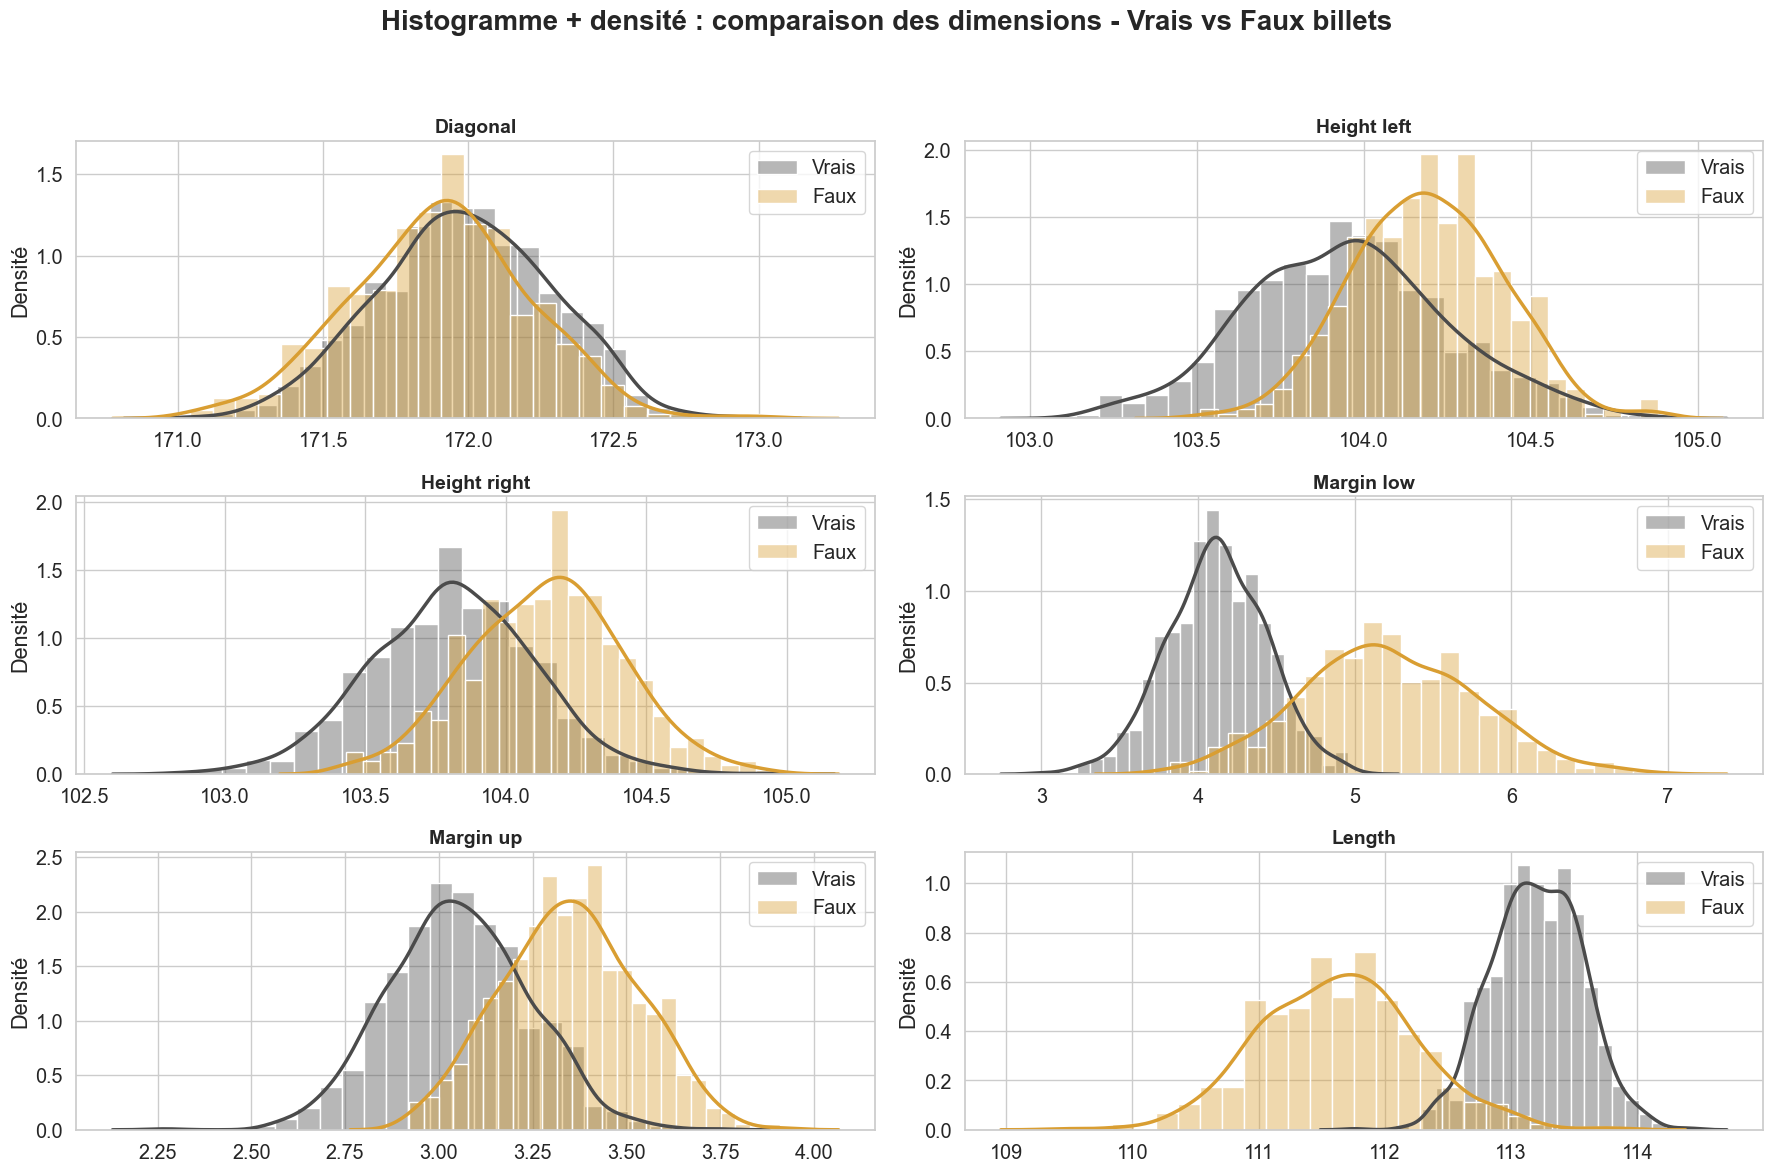

In [65]:
# Histogrammes + courbes de densité - Vrais vs Faux billets
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration générale
plt.rcParams['figure.figsize'] = (18, 12)
sns.set(style="whitegrid", font_scale=1.3)

# Liste des variables à comparer
variables = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# Couleurs
couleur_vrai = "#4B4B4B"     # gris anthracite
couleur_faux = "#D99E32"     # orange doré

# Création de la grille transposée : 3 lignes × 2 colonnes
fig, axes = plt.subplots(3, 2)
fig.suptitle("Histogramme + densité : comparaison des dimensions - Vrais vs Faux billets", fontsize=20, fontweight="bold")

# Boucle sur les variables
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Histogrammes
    sns.histplot(data=df_vrai_billets, x=var, ax=ax, color=couleur_vrai, label='Vrais', stat='density', kde=False, alpha=0.4, bins=25)
    sns.histplot(data=df_faux_billets, x=var, ax=ax, color=couleur_faux, label='Faux', stat='density', kde=False, alpha=0.4, bins=25)

    # Courbes de densité (avec is_genuine)
    sns.kdeplot(data=df_vrai_billets, x=var, ax=ax, color=couleur_vrai, lw=2.5)
    sns.kdeplot(data=df_faux_billets, x=var, ax=ax, color=couleur_faux, lw=2.5)

    # Personnalisation
    ax.set_title(var.replace('_', ' ').capitalize(), fontsize=14, fontweight="bold")
    ax.set_xlabel("")
    ax.set_ylabel("Densité")
    ax.legend()

# Ajustement mise en page
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Density : 
- Ordonnée : densité de probabilité et non pas un comptage (représente la proportion normalisée d’observations par unité d’intervalle)
- Lecture : Une barre plus haute n’indique plus un plus grand nombre absolu, mais une plus grande densité relative dans la distribution
- But : visualiser et comparer des formes de distributions

## Etape 4 - Export du fichier de travail

In [51]:
#Export du fichier retravaillé en csv pour la suite des analyses 
df_billets.to_csv("billets_final.csv", index=False)